In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import saraRC1 as sara

**Multi-Plot**

In [2]:
img_path = './images'
imgs = []

for root, dirs, files in os.walk(img_path):
    for file in files:
        imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB))

In [3]:
seg_dim = 8
saliency_maps = {}
sara_heatmaps = {}
sara_lists = {}

In [6]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

generators = ['itti', 'deepgaze', 'fpn', 'emlnet']

g = 1

for i, im in enumerate(imgs):
    if i not in saliency_maps:
        saliency_maps[i] = {}
        sara_heatmaps[i] = {}
        sara_lists[i] = {}

    for generator in generators:
        percent = round(g/(len(imgs)*len(generators))*100, 2)
        
        print(f'--> Processing image {i+1} of {len(imgs)} ({generator}) [{percent}%]')

        saliency_maps[i][generator] = sara.return_saliency(im.copy(), generator=generator)
        sara.reset()

        sara_heatmaps[i][generator], sara_lists[i][generator] = sara.return_sara(im.copy(), seg_dim, saliency_map=saliency_maps[i][generator])
        sara.reset()

        g += 1
    
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(im)
    plt.axis('off')


--> Processing image 1 of 4 (itti) [6.25%]
--> Processing image 1 of 4 (deepgaze) [12.5%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Work\uni\Summer Placement\SaRa\SaRa\benchmarking\saraRC1.py:111: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)


KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


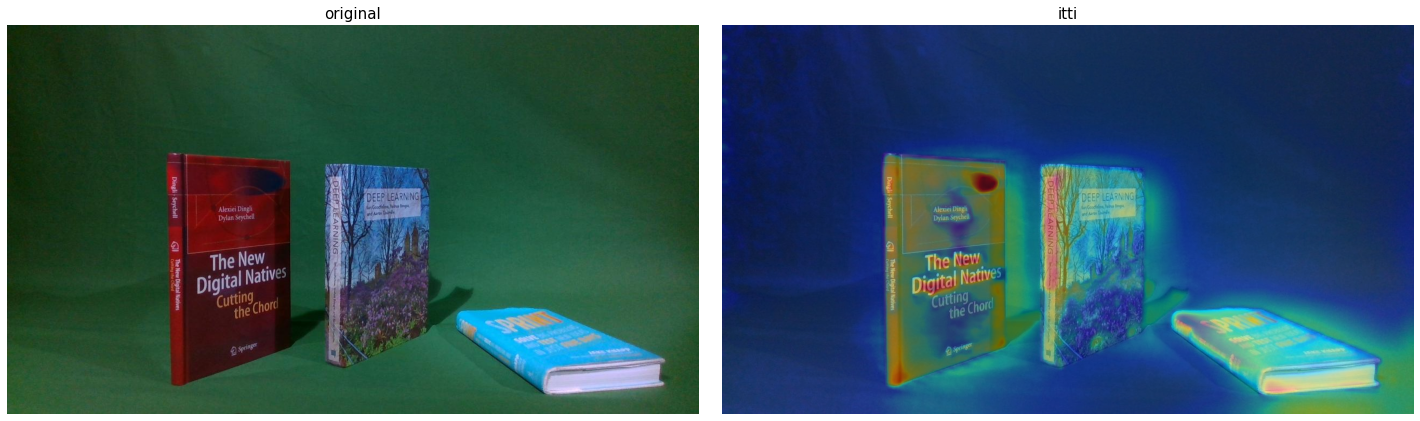

In [7]:
plt.rcParams['figure.figsize'] = [20, 11.5]
plt.figure()
plt.title('Saliency Maps')

i = 0

for img in saliency_maps:
    # Show original on the left
    plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+1)
    plt.imshow(imgs[img])
    plt.axis('off')
    i += 1
    
    for technique in saliency_maps[img]:
        plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+1)
        plt.imshow(imgs[img])
        plt.imshow(saliency_maps[img][technique], cmap='jet', alpha=0.4)
        plt.axis('off')
        i += 1

# Add column labels
i = 0
plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+1)
plt.title('original', fontsize=15)


for i, technique in enumerate(saliency_maps[img]):
    plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+2)
    plt.title(technique, fontsize=15)


plt.tight_layout()
plt.show()

0 itti
0 deepgaze
0 fpn
0 emlnet
1 itti
1 deepgaze
1 fpn
1 emlnet
2 itti
2 deepgaze
2 fpn
2 emlnet
3 itti
3 deepgaze
3 fpn
3 emlnet


c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


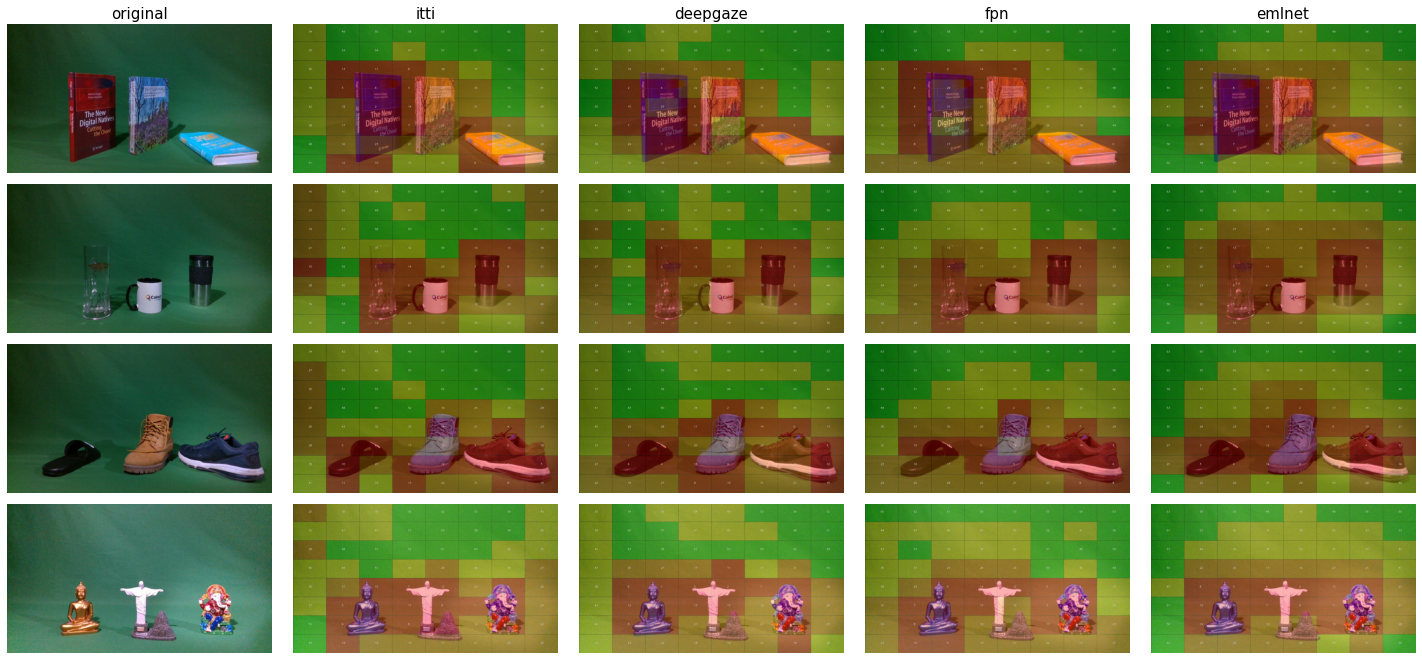

In [36]:
plt.rcParams['figure.figsize'] = [20, 11.5]
plt.figure()
plt.title('Sara Heatmaps')

i = 0

for img in sara_heatmaps:
    # Show original on the left
    plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+1)
    plt.imshow(imgs[img])
    plt.axis('off')
    i += 1
    
    for technique in sara_heatmaps[img]:
        plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+1)
        plt.imshow(cv2.cvtColor(sara_heatmaps[img][technique][0], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        i += 1

# Add column labels
i = 0
plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+1)
plt.title('original', fontsize=15)


for i, technique in enumerate(sara_heatmaps[img]):
    plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+2)
    plt.title(technique, fontsize=15)


plt.tight_layout()
plt.show()

**<h2>Spearman Correlation (Metric for Ranks)</h2>**

In [61]:
import scipy.stats as sc

ranks = {}
for key, value in sara_lists.items():
    ranks[key] = [i[0] for i in value]

print(ranks)
spr = sc.spearmanr(ranks["itti"], ranks["deepgaze"])
print(spr)


{'itti': [12, 4, 20, 21, 6, 13, 18, 3, 5, 14, 11, 19, 26, 48, 56, 17, 10, 29, 15, 25, 7, 22, 9, 24, 1, 2, 40, 32, 23, 30, 27, 8, 33, 63, 28, 16, 31, 39, 0, 47, 62, 55, 61, 37, 58, 59, 60, 53, 50, 57, 52, 36, 43, 34, 44, 51, 35, 38, 41, 49, 42, 46, 45, 54], 'deepgaze': [17, 22, 19, 9, 21, 18, 10, 6, 20, 1, 5, 7, 15, 31, 23, 14, 24, 48, 12, 13, 40, 16, 11, 4, 8, 32, 29, 2, 0, 3, 56, 63, 30, 25, 39, 47, 26, 61, 55, 52, 57, 58, 51, 53, 60, 59, 27, 45, 44, 62, 43, 41, 28, 50, 33, 49, 37, 54, 35, 42, 46, 36, 34, 38], 'fpn': [7, 1, 2, 0, 15, 3, 4, 6, 5, 23, 17, 13, 21, 29, 31, 22, 9, 10, 12, 8, 16, 20, 14, 11, 18, 19, 25, 30, 24, 32, 39, 47, 63, 40, 48, 27, 56, 28, 26, 33, 55, 61, 60, 52, 59, 51, 62, 44, 43, 35, 53, 36, 54, 57, 58, 49, 41, 37, 34, 50, 45, 38, 42, 46], 'emlnet': [0, 56, 8, 7, 1, 48, 16, 6, 2, 63, 15, 9, 40, 24, 5, 3, 32, 4, 23, 17, 14, 10, 31, 13, 11, 12, 22, 18, 21, 19, 61, 20, 62, 59, 57, 55, 29, 58, 30, 60, 39, 25, 47, 26, 51, 52, 27, 28, 53, 49, 54, 37, 45, 41, 44, 33, 43,

**<h2>Normalizing Spearman Correlation</h2>**

In [62]:
def get_norm_spr(spr_value):
    #       m - r_min
    # m -> ---------------- x (t_max - t_min) + t_min
    #       r_max - r_min
    #
    # m = measure value
    # r_min = min range of measurement
    # r_max = max range of measurement
    # t_min = min range of desired scale
    # t_max = max range of desired scale

    r_min = -1
    r_max = 1

    norm_spr = (spr_value - r_min) / (r_max - r_min)

    return norm_spr

In [64]:
norm_spr = get_norm_spr(spr.correlation)
print(norm_spr)

0.7540750915750916
